In [97]:
%pip install numpy scipy;

Note: you may need to restart the kernel to use updated packages.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

**Exercises** let's do some analysis on some fake data to get a feel for these two statistics tools.

Generate the Data: Run the code below to create the dataset `data`.

In [2]:
rnd = np.random.RandomState(seed=42)  # Makes sure the pseudorandom number generators reproduce the same data for us all.

variables = ['a', 'b', 'c', 'd']
data_a = rnd.normal(0, 1, size=20)
data_b = rnd.normal(0.2, 1, size=20)
data_c = rnd.normal(0.7, 1, size=20)
data_d = (data_a - 0.2) + rnd.normal(0, 0.2, size=20)

data = np.array([data_a, data_b, data_c, data_d]).T
data

array([[ 0.49671415,  1.66564877,  1.43846658,  0.20087931],
       [-0.1382643 , -0.0257763 ,  0.87136828, -0.3753961 ],
       [ 0.64768854,  0.2675282 ,  0.58435172,  0.22642154],
       [ 1.52302986, -1.22474819,  0.3988963 ,  1.08378853],
       [-0.23415337, -0.34438272, -0.77852199, -0.27164821],
       [-0.23413696,  0.31092259, -0.01984421, -0.16288895],
       [ 1.57921282, -0.95099358,  0.23936123,  1.36481079],
       [ 0.76743473,  0.57569802,  1.75712223,  0.76814131],
       [-0.46947439, -0.40063869,  1.04361829, -0.59714718],
       [ 0.54256004, -0.09169375, -1.06304016,  0.21353609],
       [-0.46341769, -0.40170661,  1.02408397, -0.59113857],
       [-0.46572975,  2.05227818,  0.31491772, -0.35812244],
       [ 0.24196227,  0.18650278,  0.023078  ,  0.03479706],
       [-1.91328024, -0.85771093,  1.31167629, -1.80035151],
       [-1.72491783,  1.02254491,  1.73099952, -2.44886685],
       [-0.56228753, -1.02084365,  1.63128012, -0.59790703],
       [-1.01283112,  0.

## Visualize the Data

What do these four variables look like, when compared against each other?  Let's take a look using three types of plots and matplotlib:

| Plot type | Function | Example Code |
| :--  | :-- | :-- |
| **Box Plot** | `plt.boxplot()` | `plt.boxplot([x, y, z])` |
| **Violin Plot** | `plt.violin()` | `plt.violin([x, y, z])` |
| **Label X Tick Marks**| `plt.xticks(locations, labels)`  | `plt.xticks([1, 2], ['a', 'b'])` |

**Exercises**

Make a Violin Plot of the four columns of `data`.  Label the X axis with the variable names "a", "b", "c", and "d" for each of the four datasets.

In [ ]:
plt.violinplot([data[:, 0], data[:, 1], data[:, 2], data[:, 3]])
plt.xticks([1, 2, 3, 4], ['a', 'b', 'c', 'd']);

Make a Box Plot of the four columns of `data`. Label the X axis with the variable names "a", "b", "c", and "d" for each of the four datasets.

In [ ]:
plt.boxplot([data[:, 0], data[:, 1], data[:, 2], data[:, 3]], labels=['a', 'b', 'c', 'd']);

**Discussion**: Which of the three plots above do you find most interesting?  What information do you get from each of them?

### Doing T-Tests with the Scipy.Stats

[**Scipy.Stats**](https://docs.scipy.org/doc/scipy/reference/stats.html) has all the stats functions you know and love from statistics class.  Like all the functions in the [scipy](https://docs.scipy.org/doc/scipy/getting_started.html) package, it is fully-compatible with Numpy.


T-tests compare the means of two samples of data generated from a normally-distributed population and compute the probability that they have the same mean. When the p-value is very low, it tells us that the two data samples must have come from different populations.  Both packages have functions for t-tests! 


| Test, | `scipy.stats` Function, | 
| :---: | :---: |
| One-Sampled T-Test | [**stats.ttest_1samp(x, 0)**](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_1samp.html#scipy.stats.ttest_1samp) | 
| Independent T-Test | [**stats.ttest_ind(x, y)**](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html#scipy.stats.ttest_ind)
| Paired T-test | [**stats.ttest_rel(x, y)**](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_rel.html#scipy.stats.ttest_rel)


**Exercises**

**A vs 0, One-Sampled T-Test**: Is the mean of the normally-distributed population that the the dataset A is generated from unlikely to be zero?

*Example*:

In [50]:
stats.ttest_1samp(data[:, 0], 0)

Ttest_1sampResult(statistic=-0.797966433655592, pvalue=0.43475058842710046)

**B vs 1, One-Sampled T-Test**: Is the mean of the normally-distributed population that the the dataset B is generated from unlikely to be one?

In [51]:
stats.ttest_1samp(data[:, 1], 1)

Ttest_1sampResult(statistic=-4.924581626018964, pvalue=9.410444261361524e-05)

**A vs B, Independent Samples T-Test**: Is the mean of the normally-distributed population that the the dataset `A` is generated from unlikely to be the same as the mean of the normally-distributed population that the the dataset `B` is generated from?

In [52]:
stats.ttest_ind(data[:, 0], data[:, 1])

Ttest_indResult(statistic=-0.34548496872508355, pvalue=0.7316350980688235)

**A vs C, Independent Samples T-Test**: Is the mean of the normally-distributed population that the the dataset `A` is generated from unlikely to be the same as the mean of the normally-distributed population that the the dataset `C` is generated from?

In [53]:
stats.ttest_ind(data[:, 0], data[:, 2])

Ttest_indResult(statistic=-2.990400096331035, pvalue=0.004868348606416014)

**A vs C, Paired Samples T-Test (a.k.a Relative Samples T-Test)**: Is the mean of the differences between each pair of samples in generated from the two normally-distributed populations `A` and `C`  unlikely to be 0?

In [54]:
stats.ttest_rel(data[:, 0], data[:, 2])

Ttest_relResult(statistic=-2.5719051374033515, pvalue=0.018669862069265977)

**A vs D, Paired Samples T-Test**: Is the mean of the differences between each pair of samples in generated from the two normally-distributed populations `A` and `D`  unlikely to be 0?

In [55]:
stats.ttest_rel(data[:, 0], data[:, 2])

Ttest_relResult(statistic=-2.5719051374033515, pvalue=0.018669862069265977)

### Extra: Thinking about the Data as a Representative Sample Using Bootstrappng: Inferential Statistics and the Law of Large Numbers

If you have enough data that your sample roughly approximates the distribution of the population it draws from (a.k.a. "The Law of Large Numbers"), then we can use that data to put error bars on any statistic we compute from it, simply by sampling again from our data (essentially "repeating" our experiment, treating our sample as a stand-in for the population it draws from), calculating the statistic for each replication, and looking at the distribution of statistics.  This general approach to inferential statistics is called "bootstrapping".

With Numpy, you can do most boostrapping using only three steps: 

  1. **Resample from your dataset**: Select randomly from a dataset, making N experiments of the same size as the original.  Use as many reps as you want: more is better.
  
  `boots = np.random.choice(a, size=(len(a), NReps), replace=True)` 
  
  2. **Calculate the statistic for every replication**: What was the mean, or std, or median, for those experiments?  
  
  `aggs = np.mean(boots, axis=0)`
  
  3. **Calculate the 95% Confidence Interval**:  What was your range of values that you calculated?  Getting the values at the 2.5 and 97.5 percentiles of those statistics will do the trick.  If you are plotting your data, these two values are the lower and upper bounds of the error bars in the plot.
  
  `ci = np.percentile(aggs, [2.5, 97.5])`

**Exercises**: Use bootstrapping with Numpy to calculate the N% confidence intervals of the requested statistic for each dataset:

Example: Estimate the 90% CI of the median of `data_a`:

In [76]:
boots = np.random.choice(data_a, size=(len(data_a), 10000))
aggs = np.median(boots, axis=0)
ci = np.percentile(aggs, [5, 95])
ci

array([-0.46947439,  0.31424733])

Estimate the 95% CI of the mean of `data_b`:

In [87]:
boots = np.random.choice(data_b, size=(len(data_b), 10000))
aggs = np.median(boots, axis=0)
ci = np.percentile(aggs, [2.5, 97.5])
ci

array([-0.62970877,  0.35389191])

Estimate the 99% CI of the standard deviation of `data_c`:

In [88]:
boots = np.random.choice(data_c, size=(len(data_c), 10000))
aggs = np.median(boots, axis=0)
ci = np.percentile(aggs, [.5, 99.5])
ci

array([0.10975851, 1.37507143])

Estimate the 50% CI of the mean of `data_d`:

In [89]:
boots = np.random.choice(data_d, size=(len(data_d), 10000))
aggs = np.median(boots, axis=0)
ci = np.percentile(aggs, [25, 75])
ci

array([-0.3753961 , -0.16288895])

#### Using `scipy.stats.bootstrap()` to make bootstrapping simpler:

With a single function in `scipy.stats`, we can do the whole analysis! Let's try the same exercises, this time using `scipy.stats.bootstrap()`

Example: Estimate the 90% CI of the median of `data_a`:

In [93]:
stats.bootstrap((data_a,), np.median, confidence_level=.90, n_resamples=10000)

BootstrapResult(confidence_interval=ConfidenceInterval(low=-0.5158809575879624, high=0.278104802080654), standard_error=0.2692778252650704)

Estimate the 95% CI of the mean of `data_b`:

In [94]:
stats.bootstrap((data_b,), np.mean, confidence_level=.95, n_resamples=10000)

BootstrapResult(confidence_interval=ConfidenceInterval(low=-0.4453378510799528, high=0.3874059613317263), standard_error=0.21116216116688888)

Estimate the 99% CI of the standard deviation of `data_c`:

In [95]:
stats.bootstrap((data_c,), np.std, confidence_level=.99, n_resamples=10000)

BootstrapResult(confidence_interval=ConfidenceInterval(low=0.5766702394411095, high=1.1042224717353886), standard_error=0.1073321387006091)

Estimate the 50% CI of the mean of `data_d`:

In [96]:
stats.bootstrap((data_d,), np.mean, confidence_level=.50, n_resamples=10000)

BootstrapResult(confidence_interval=ConfidenceInterval(low=-0.528675660772405, high=-0.2409217250823727), standard_error=0.21374644363936499)

#### Extra Extra: Plotting Errorbars using `plt.errorbar()`

Use Matplotlib's `plt.errorbar()` functoin to put errorbars on barplots sohwing the means of `data_a`, `data_b`, `data_c`, and `data_d` and their confidence intervals (note: you'll have to calculate the confidence intervals yourself).

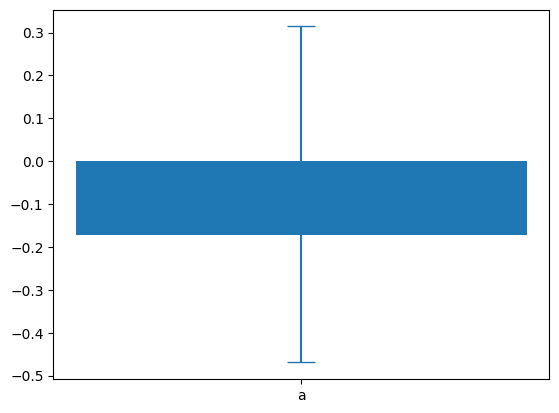

In [85]:
plt.bar(['a'], [np.mean(data_a)]);
plt.errorbar(
    [0], 
    np.mean(data_a), 
    yerr=[[np.mean(data_a) - ci[0]], [ci[1]  - np.mean(data_a)]], 
    capsize=10
);